# Surprise Housing Company House Price Prediction

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

# Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

Data Definitions: https://cdn.upgrad.com/UpGrad/temp/87f67e28-c47e-4725-ae3c-111142c7eaba/data_description.txt

Dataset: https://ml-course3-upgrad.s3.amazonaws.com/Assignment_+Advanced+Regression/train.csv

In [73]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
import statsmodels.tsa.api as smt
import scipy as sp
import statsmodels.api as sm
import math
import warnings
warnings.filterwarnings('ignore')#to ignore warnings
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
%matplotlib inline

In [74]:
#load the data
df=pd.read_csv("train.csv",index_col=0)
#display head
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [75]:
df.shape#display the shape

(1460, 80)

In [76]:
df = df.drop_duplicates()#remove duplicates if any

In [77]:
df.shape#display the shape

(1460, 80)

convert MSSubClass,OverallQual,OverallCond,YrSold,MoSold to category type since it has categorical information

In [78]:
df[['MSSubClass']] = df[['MSSubClass']].astype(str) 
df[['OverallQual']] = df[['OverallQual']].astype(str) 
df[['OverallCond']] = df[['OverallCond']].astype(str) 
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [79]:
df.describe()#describe the  data frame

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,70.05,10516.83,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,180921.20
std,24.28,9981.26,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,79442.50
min,21.00,1300.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,34900.00
25%,59.00,7553.50,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,129975.00
50%,69.00,9478.50,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,163000.00
75%,80.00,11601.50,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,214000.00
max,313.00,215245.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,755000.00


print null values percentage

In [80]:
#df.drop(null_percentage[ null_percentage > 6 ].index, axis=1, inplace=True)
#df = df.dropna(axis=0,thresh=2)
null_percentage = round(100*(df.isnull().sum()/len(df.index)),3)
null_percentage[null_percentage>0]

LotFrontage    17.74
Alley          93.77
MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
FireplaceQu    47.26
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

fill categorical feature null values into "None" value, since these values are missing during data collection

In [81]:
null_categoric_cols = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Electrical', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for column in null_categoric_cols:
    df[column]= df[column].fillna('None')

filling null (or) missing values of numerical features

In [82]:
df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['GarageYrBlt']= df['GarageYrBlt'].fillna(0)

In [83]:
df['MasVnrArea'].value_counts()#display value counts

0.00      869
180.00      8
72.00       8
108.00      8
120.00      7
         ... 
562.00      1
89.00       1
921.00      1
762.00      1
119.00      1
Name: MasVnrArea, Length: 327, dtype: int64

In [84]:
df.isnull().sum()#display null values sum

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [85]:
df.head()#display head

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.00,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
2,20,RL,80.00,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
3,60,RL,68.00,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
4,70,RL,60.00,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,60,RL,84.00,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


get categorical and numerical columns for visualization

In [86]:
numerics = ['int16', 'int32', 'int64','float32','float64']
categoric = ['object',"category"]
#get numeric and categoric columns for data analysis
df_visu_numeric = df.select_dtypes(include=numerics)
df_visu_categoric = df.select_dtypes(include = categoric)
#print length of numeric and categoric columns
print("numeric: ",len(df_visu_numeric.columns))
print("categoric: ",len(df_visu_categoric.columns))

numeric:  32
categoric:  48


display countplot for categorical columns

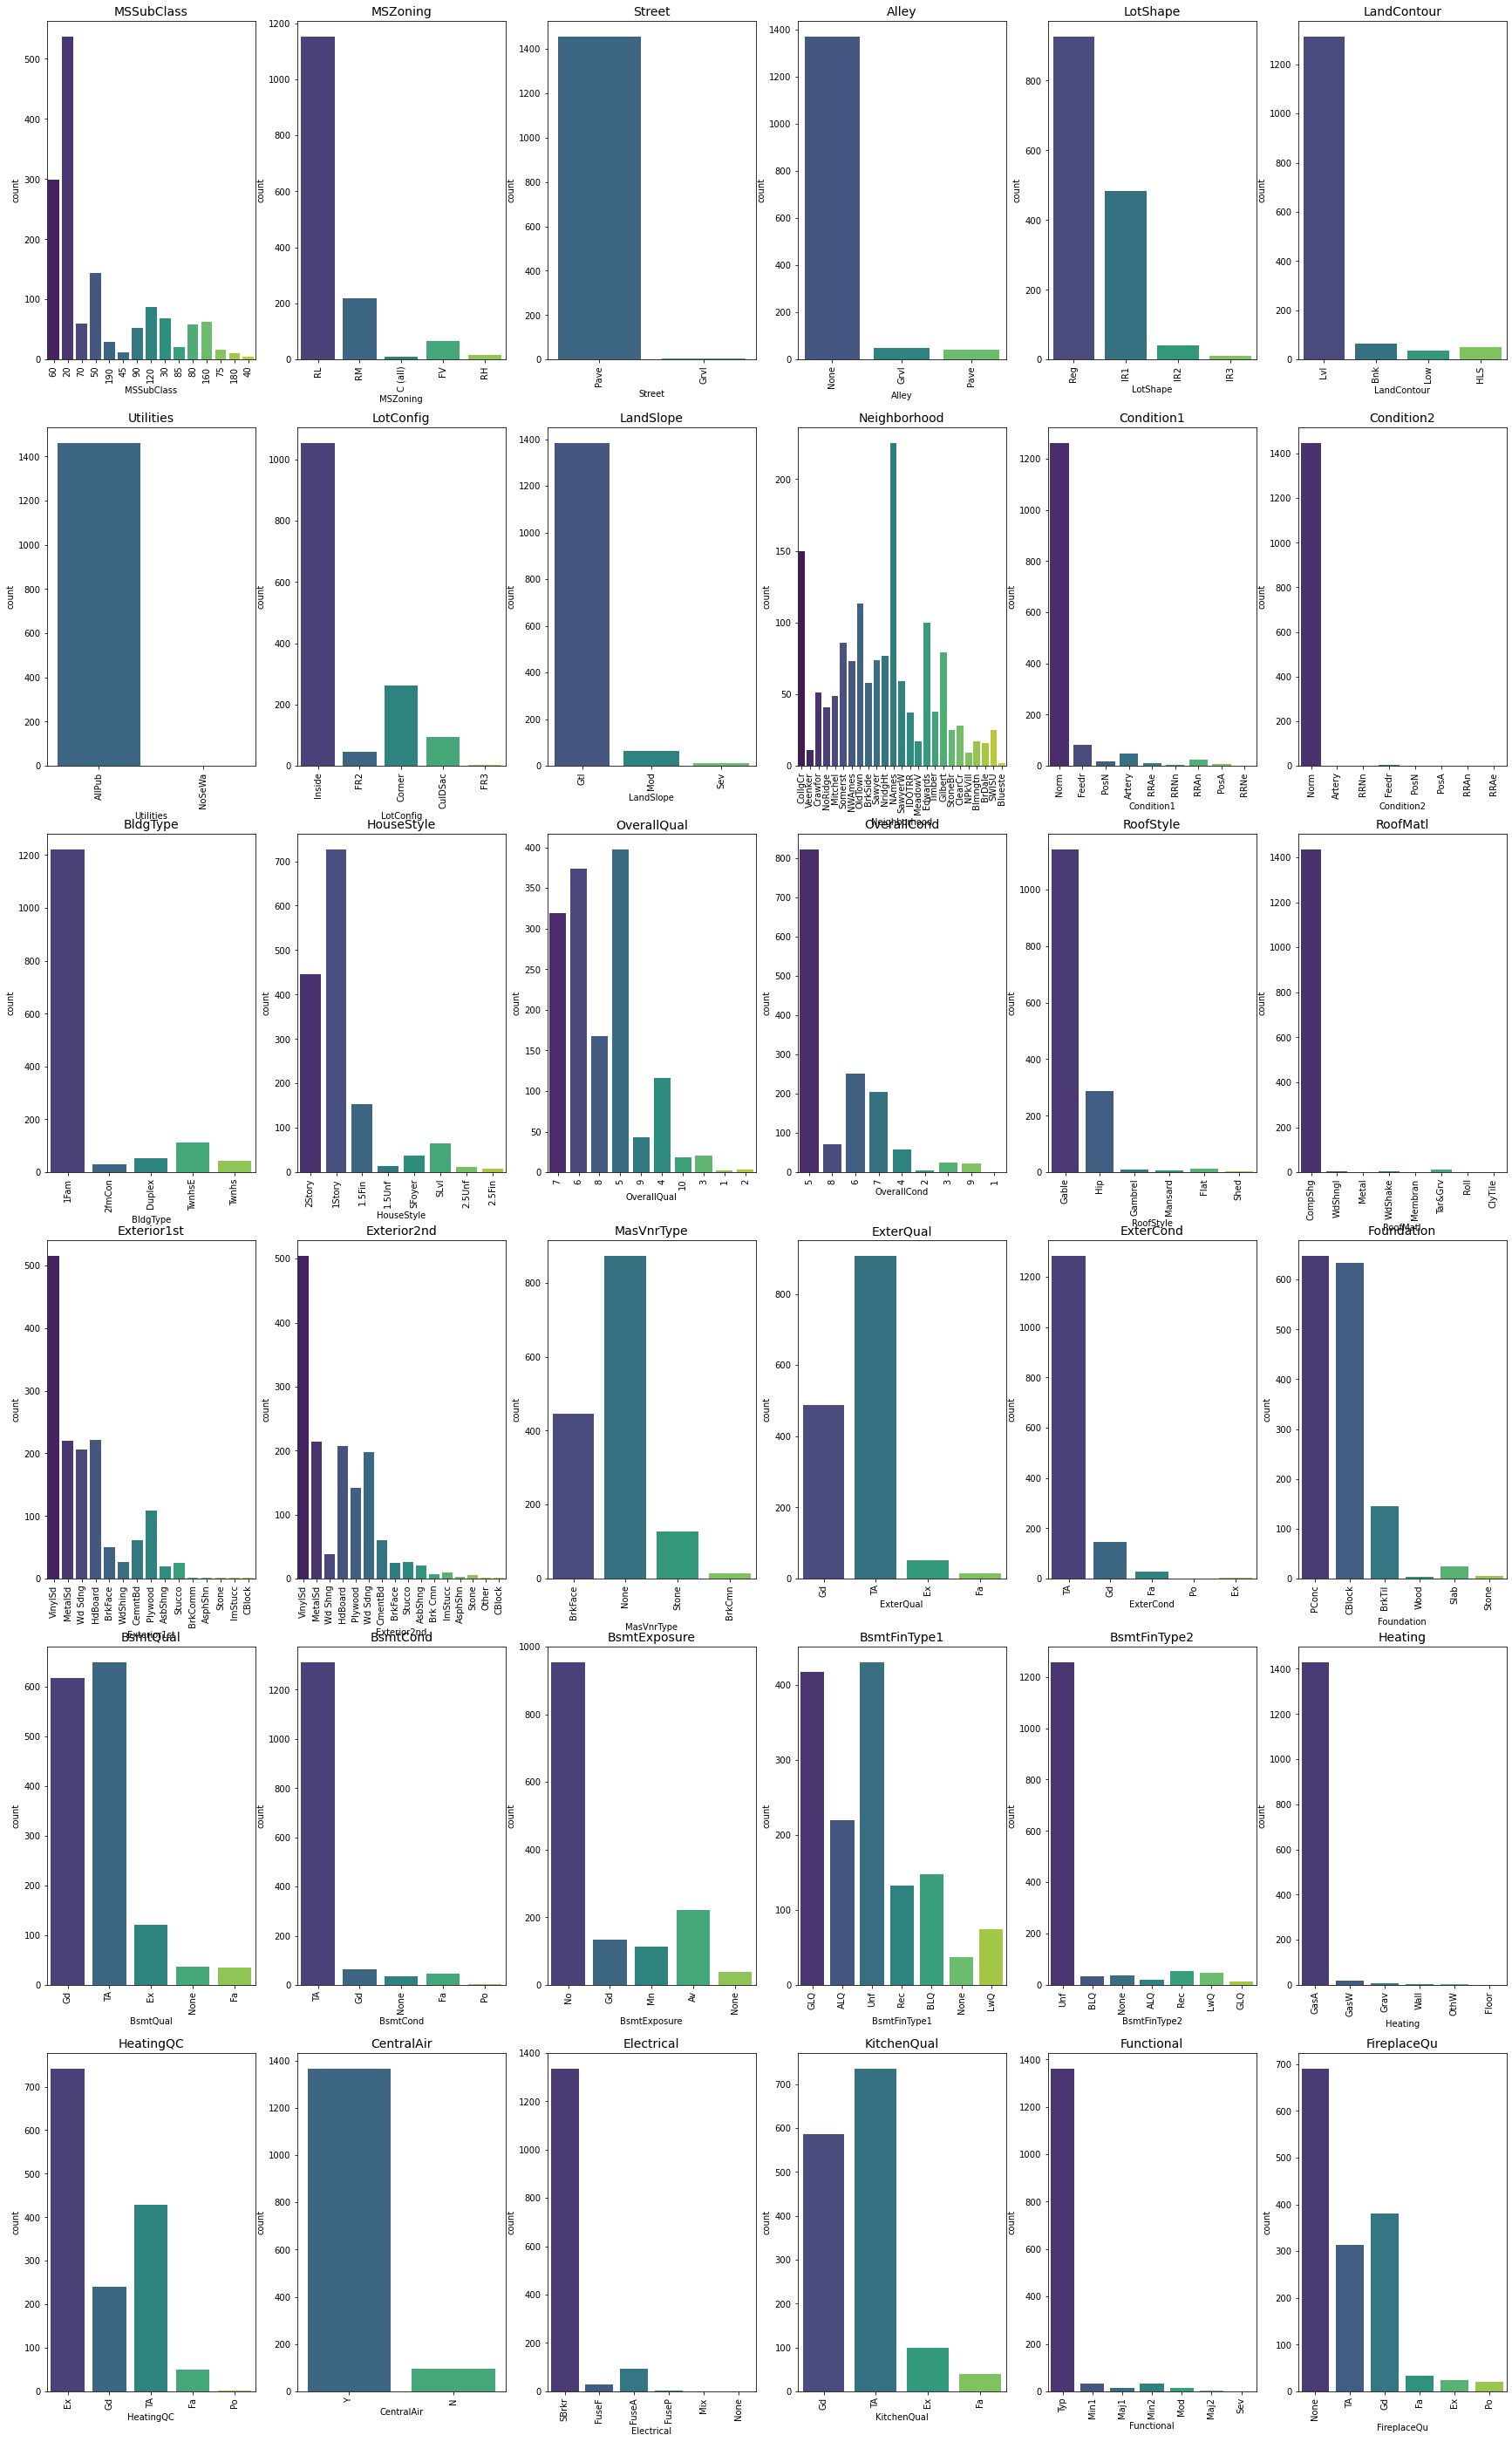

In [87]:
plt.figure(figsize=(30,50))
for i in range(min(36,len(df_visu_categoric.columns))):
    plt.subplot(6,6, i + 1)
    ax=sns.countplot(df[df_visu_categoric.columns[i]],palette = 'viridis')
    ax.set_title(str(df_visu_categoric.columns[i]), fontsize=14)
    plt.xticks(rotation=90)
plt.show()

create dummy columns for categorical features and remove first column, and also concatenate all the remaining columns

In [88]:
df_dummy= pd.get_dummies(df[df_visu_categoric.columns],drop_first = True)   
df=pd.concat([df,df_dummy],axis=1)
df= df.drop(df_visu_categoric.columns,axis=1) 

get categorical and numerical columns, all categorical columns converted into numerical columns

In [89]:
numerics = ['int16', 'int32', 'int64','float32','float64','uint8']
categoric = ['object',"category"]
#get numeric and categoric columns for data analysis
numeric_cols = df.select_dtypes(include=numerics).columns
categoric_cols = df.select_dtypes(include = categoric).columns
#print length of numeric and categoric columns
print("numeric: ",len(numeric_cols))
print("categoric: ",len(categoric_cols))

numeric:  302
categoric:  0


In [90]:
df_visu_numeric.columns#display numeric columns before dummy variables creation

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')

In [91]:
df.shape#display dataframe shape

(1460, 302)

In [92]:
df_visu_categoric.columns#display categorical columns before dummy variables creation

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

display box plot for numerical columns

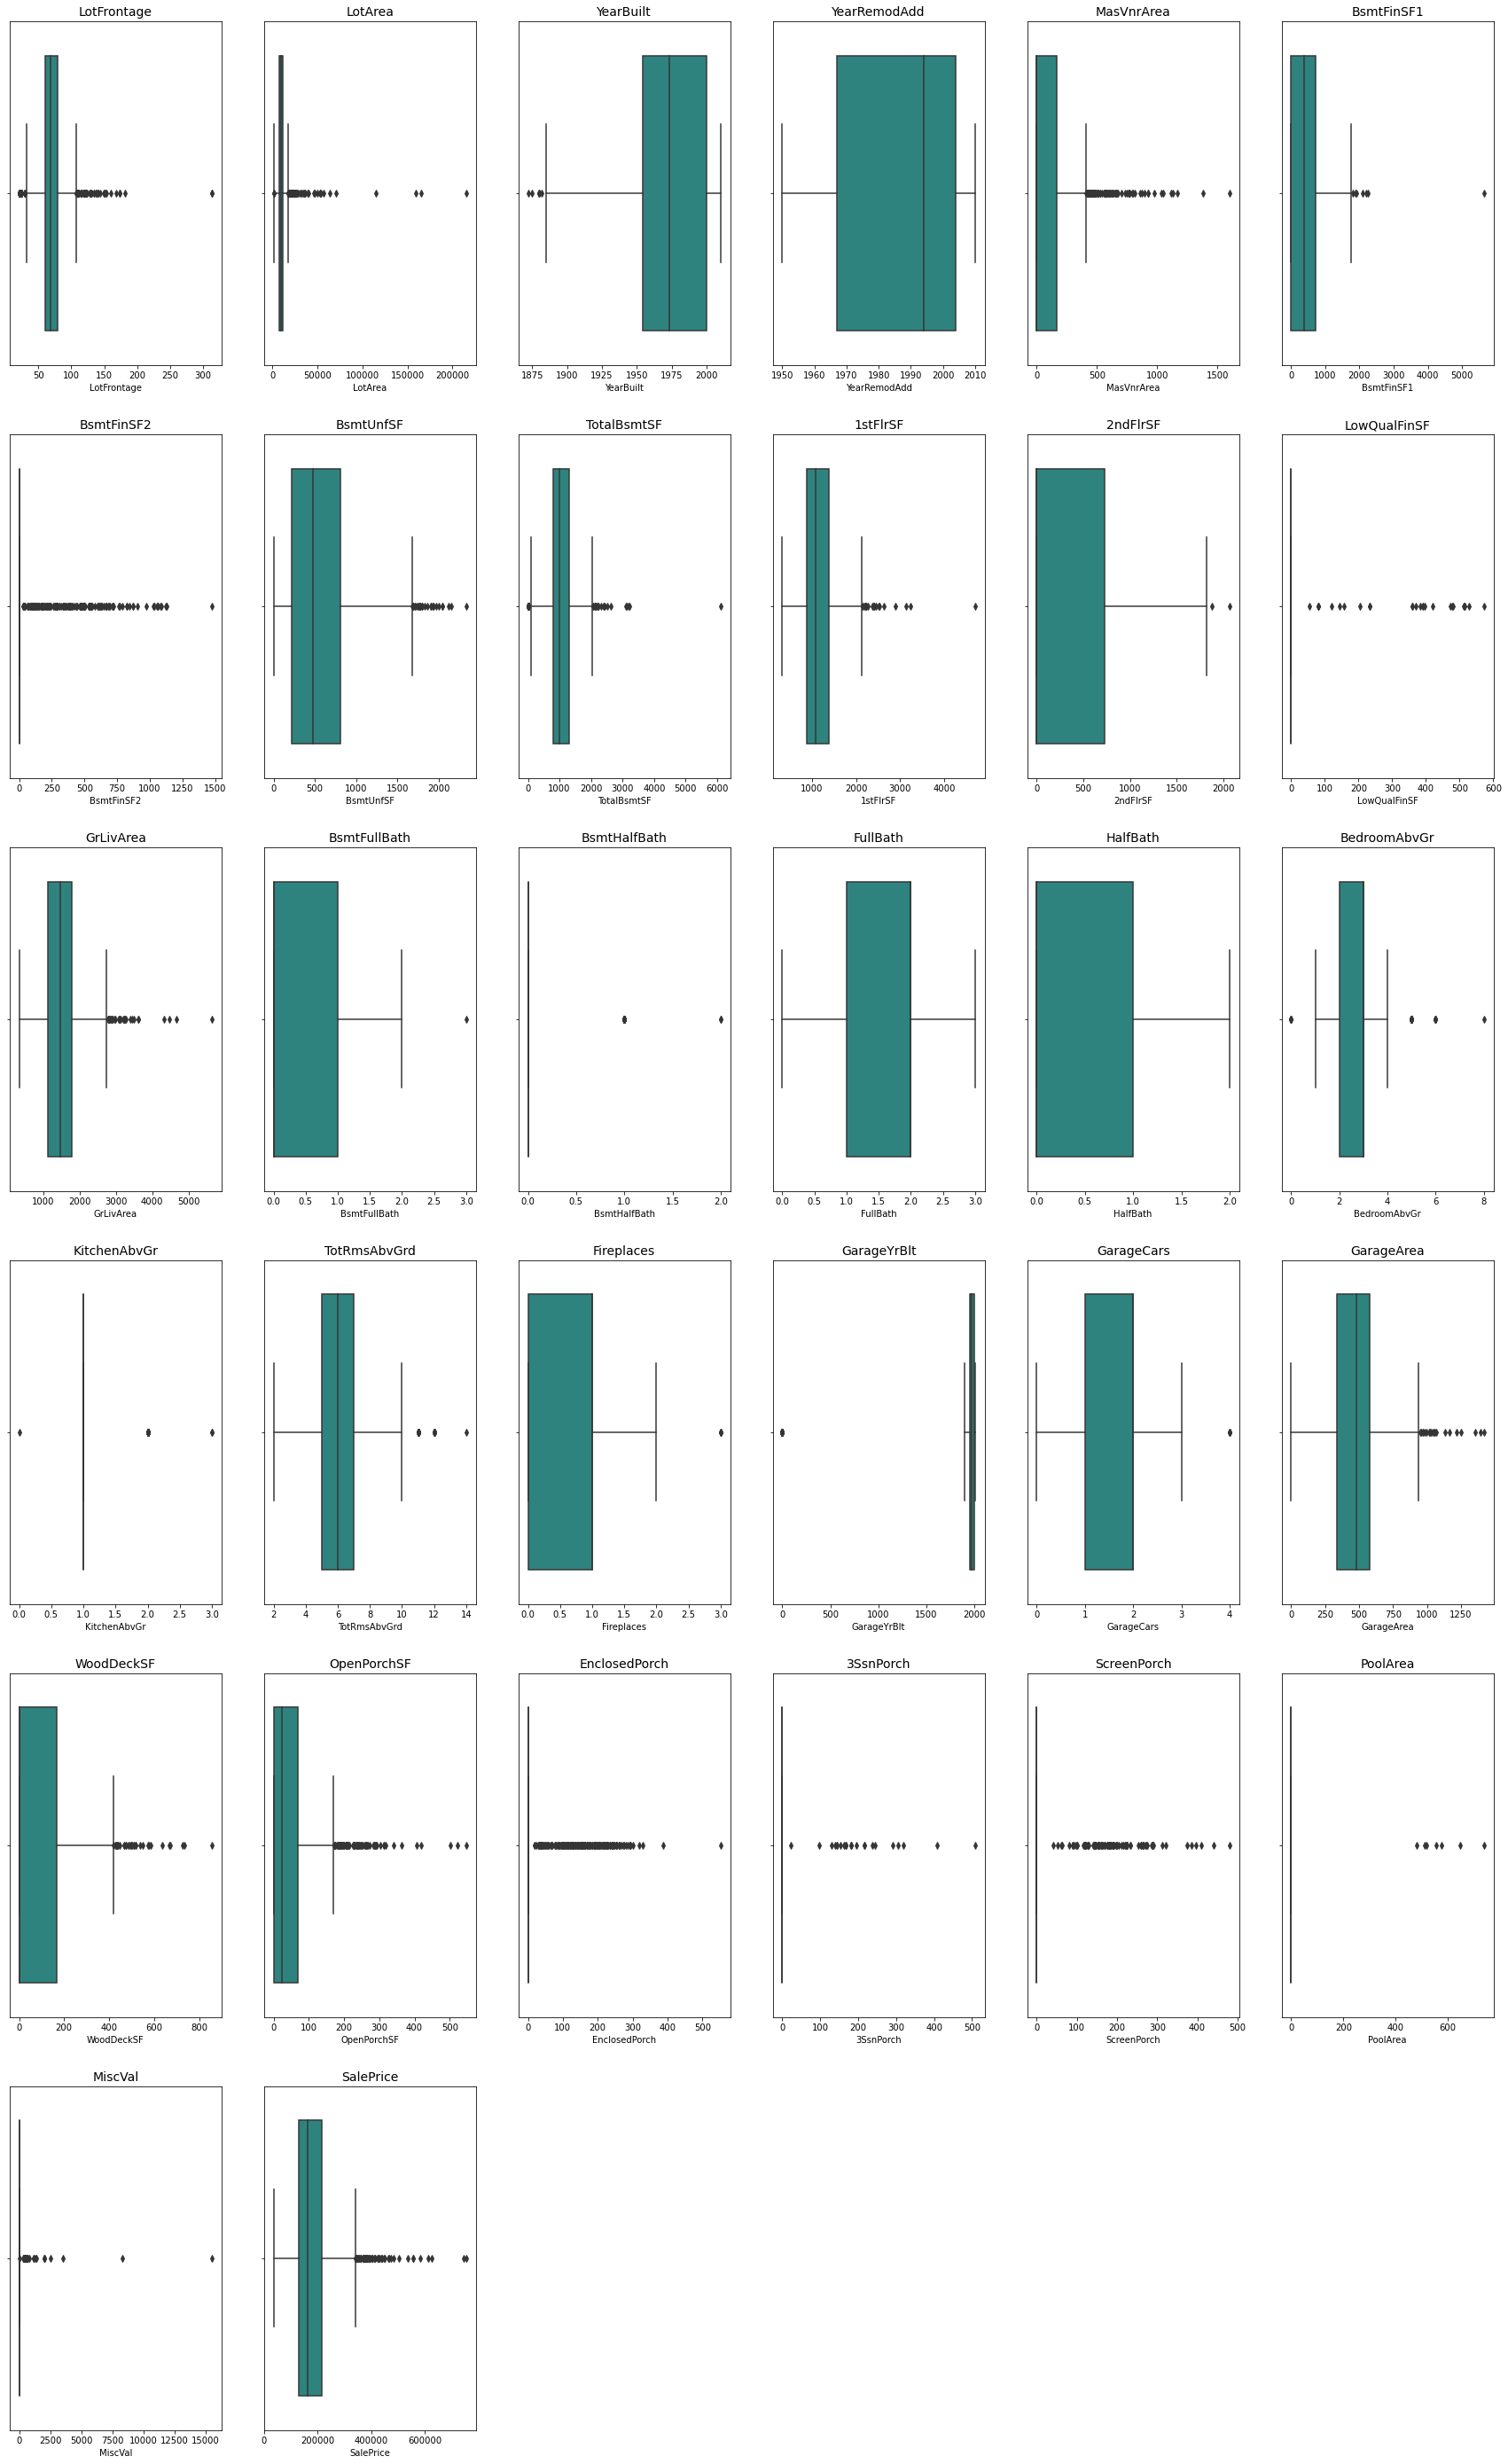

In [93]:
plt.figure(figsize=(30,50))
for i in range(min(32,len(df_visu_numeric.columns))):
    plt.subplot(6,6, i + 1)
    ax=sns.boxplot(df_visu_numeric.columns[i], data=df,palette = 'viridis')
    ax.set_title(str(df_visu_numeric.columns[i]), fontsize=14)
plt.show()

dispaly different quantile ranges

In [94]:
print("\nLotArea\n",df["LotArea"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\nBsmtFinSF1\n",df["BsmtFinSF1"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\nBsmtFinSF2\n",df["BsmtFinSF2"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\nTotalBsmtSF\n",df["TotalBsmtSF"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\nBsmtFinSF2\n",df["BsmtFinSF2"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\nLowQualFinSF\n",df["LowQualFinSF"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\nBsmtHalfBath\n",df["BsmtHalfBath"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\nKitchenAbvGr\n",df["KitchenAbvGr"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\nEnclosedPorch\n",df["EnclosedPorch"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\n3SsnPorch\n",df["3SsnPorch"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\nScreenPorch\n",df["ScreenPorch"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\nPoolArea\n",df["PoolArea"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\nMiscVal\n",df["MiscVal"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))


LotArea
 0.15     6120.00
0.20     7078.40
0.35     8450.00
0.50     9478.50
0.75    11601.50
0.98    25251.62
0.99    37567.64
1.00   215245.00
Name: LotArea, dtype: float64

BsmtFinSF1
 0.15      0.00
0.20      0.00
0.35     56.65
0.50    383.50
0.75    712.25
0.98   1442.64
0.99   1572.41
1.00   5644.00
Name: BsmtFinSF1, dtype: float64

BsmtFinSF2
 0.15      0.00
0.20      0.00
0.35      0.00
0.50      0.00
0.75      0.00
0.98    658.12
0.99    830.38
1.00   1474.00
Name: BsmtFinSF2, dtype: float64

TotalBsmtSF
 0.15    701.70
0.20    755.80
0.35    864.00
0.50    991.50
0.75   1298.25
0.98   2001.64
0.99   2155.05
1.00   6110.00
Name: TotalBsmtSF, dtype: float64

BsmtFinSF2
 0.15      0.00
0.20      0.00
0.35      0.00
0.50      0.00
0.75      0.00
0.98    658.12
0.99    830.38
1.00   1474.00
Name: BsmtFinSF2, dtype: float64

LowQualFinSF
 0.15     0.00
0.20     0.00
0.35     0.00
0.50     0.00
0.75     0.00
0.98     0.00
0.99   360.00
1.00   572.00
Name: LowQualFinSF, dtype: floa

remove outliers based on quantile values

In [95]:
df = df[df["LotArea"] < df['LotArea'].quantile(0.98)]
#df = df[df["BsmtFinSF1"] < df['BsmtFinSF1'].quantile(0.99)]
#df = df[df["BsmtFinSF2"] < df['BsmtFinSF2'].quantile(0.99)]
#df = df[df["TotalBsmtSF"] < df['TotalBsmtSF'].quantile(0.99)]
#df = df[df["BsmtFinSF2"] < df['BsmtFinSF2'].quantile(0.99)]
#df = df[df["LowQualFinSF"] < df['LowQualFinSF'].quantile(0.99)]
#df = df[df["BsmtHalfBath"] < df['BsmtHalfBath'].quantile(0.99)]
#df = df[df["KitchenAbvGr"] < df['KitchenAbvGr'].quantile(0.99)]
#df = df[df["EnclosedPorch"] < df['EnclosedPorch'].quantile(0.99)]
#df = df[df["3SsnPorch"] < df['3SsnPorch'].quantile(0.99)]
#df = df[df["ScreenPorch"] < df['ScreenPorch'].quantile(0.99)]
#df = df[df["PoolArea"] < df['PoolArea'].quantile(0.99)]
#df = df[df["MiscVal"] < df['MiscVal'].quantile(0.99)]

display distribution plot for numerical columns

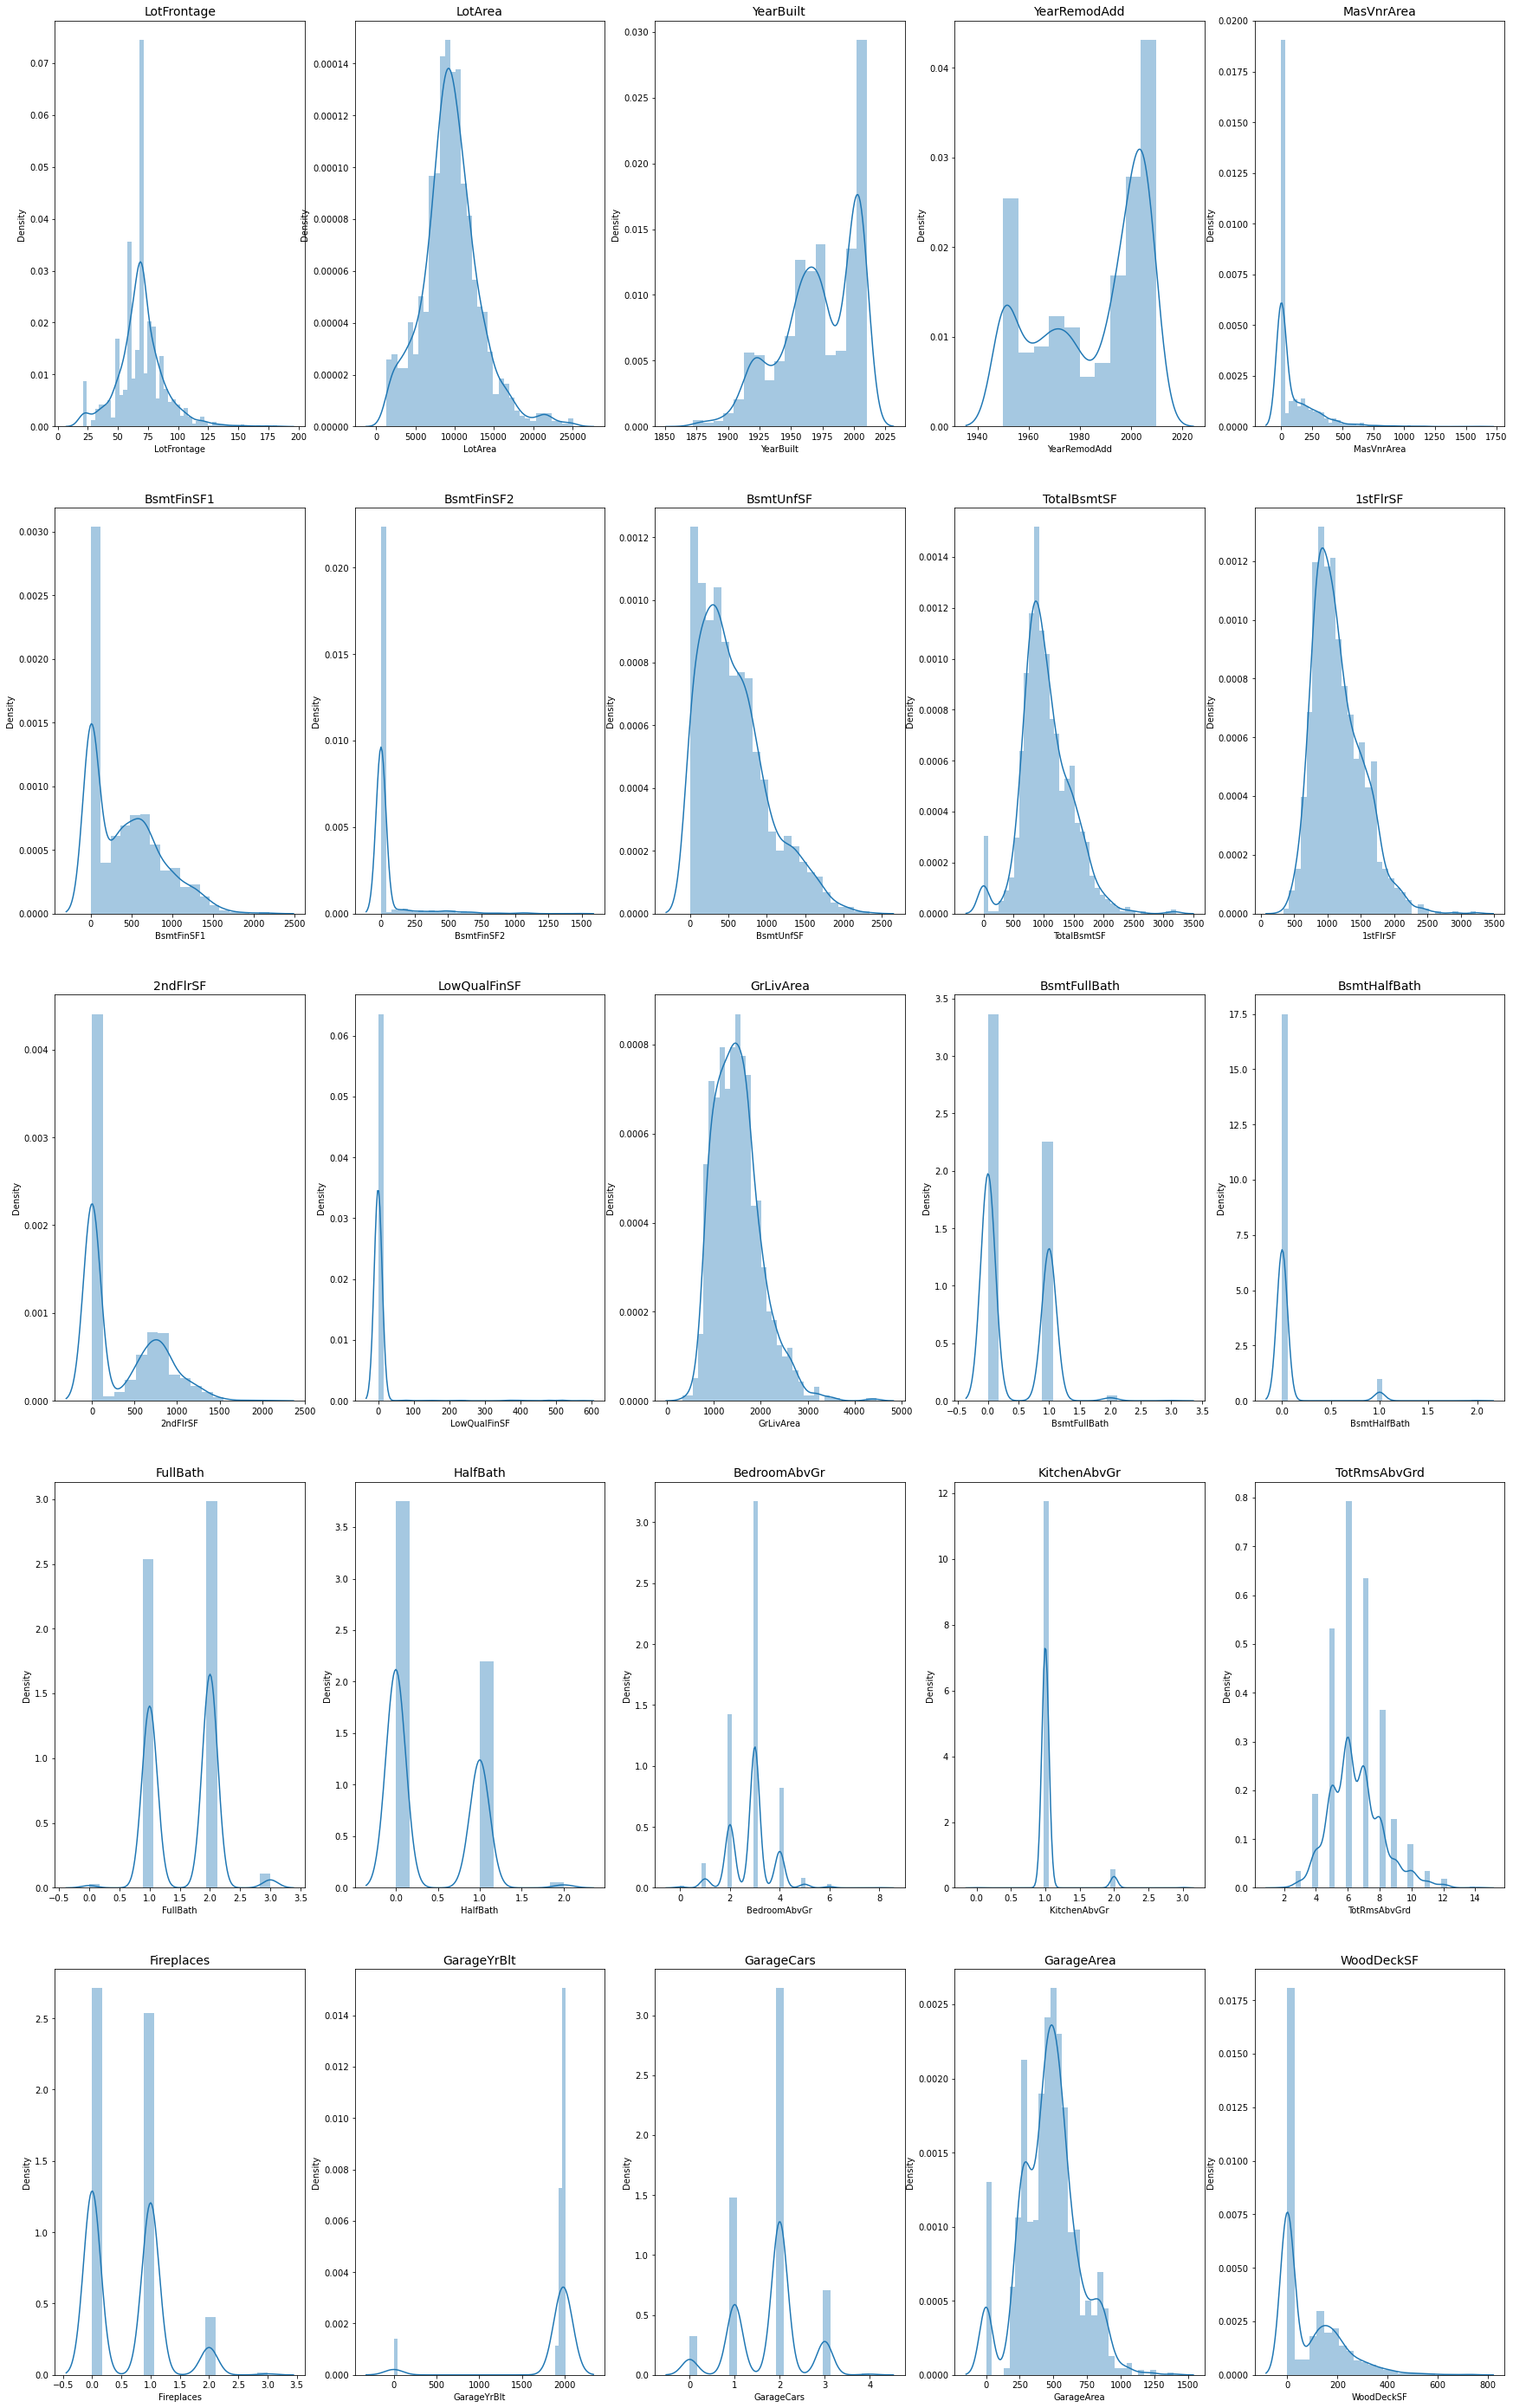

In [96]:
plt.figure(figsize=(30,50))
for i in range(min(25,len(df_visu_numeric.columns))):
    plt.subplot(5,5, i + 1)
    ax=sns.distplot(df[df_visu_numeric.columns[i]])
    ax.set_title(str(df_visu_numeric.columns[i]), fontsize=14)
plt.show()

display scatter plot for numerical columns

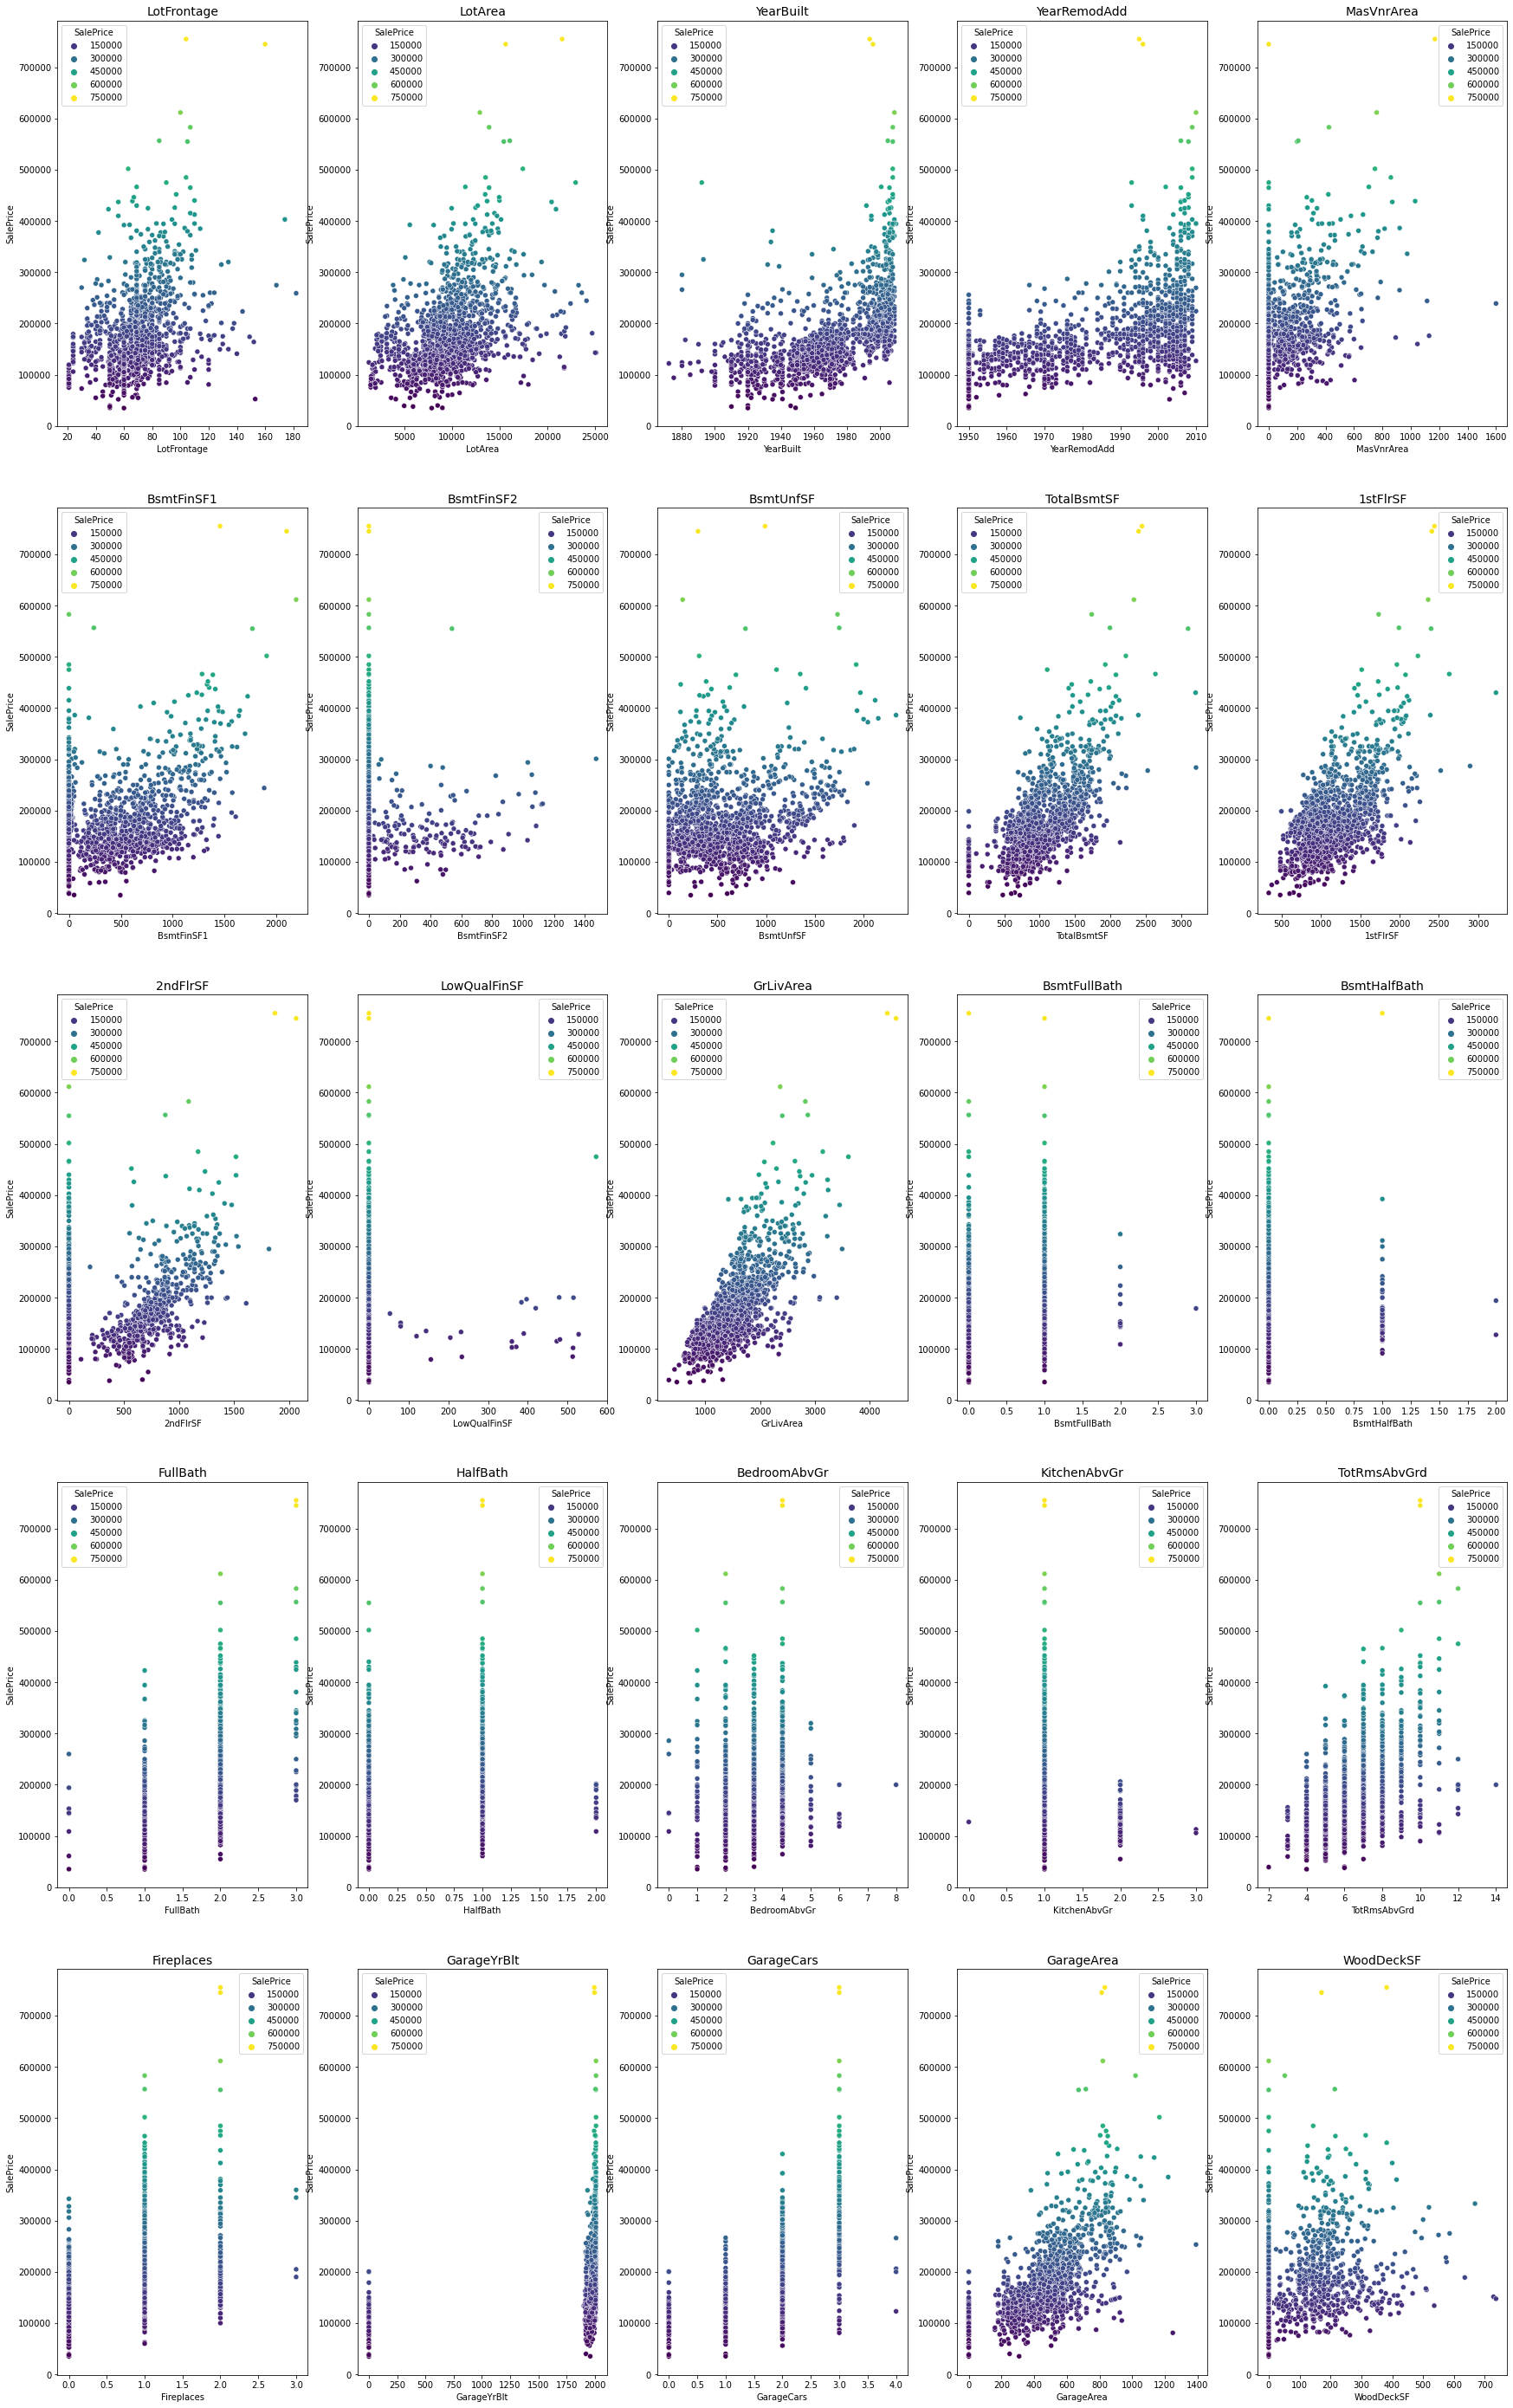

In [97]:
plt.figure(figsize=(30,50))
for i in range(min(25,len(df_visu_numeric.columns))):
    plt.subplot(5,5, i + 1)
    ax=sns.scatterplot(x=df_visu_numeric.columns[i], y='SalePrice', hue='SalePrice',data=df,palette='viridis')
    ax.set_title(str(df_visu_numeric.columns[i]), fontsize=14)
plt.show()

display correlation plot for all numerical features

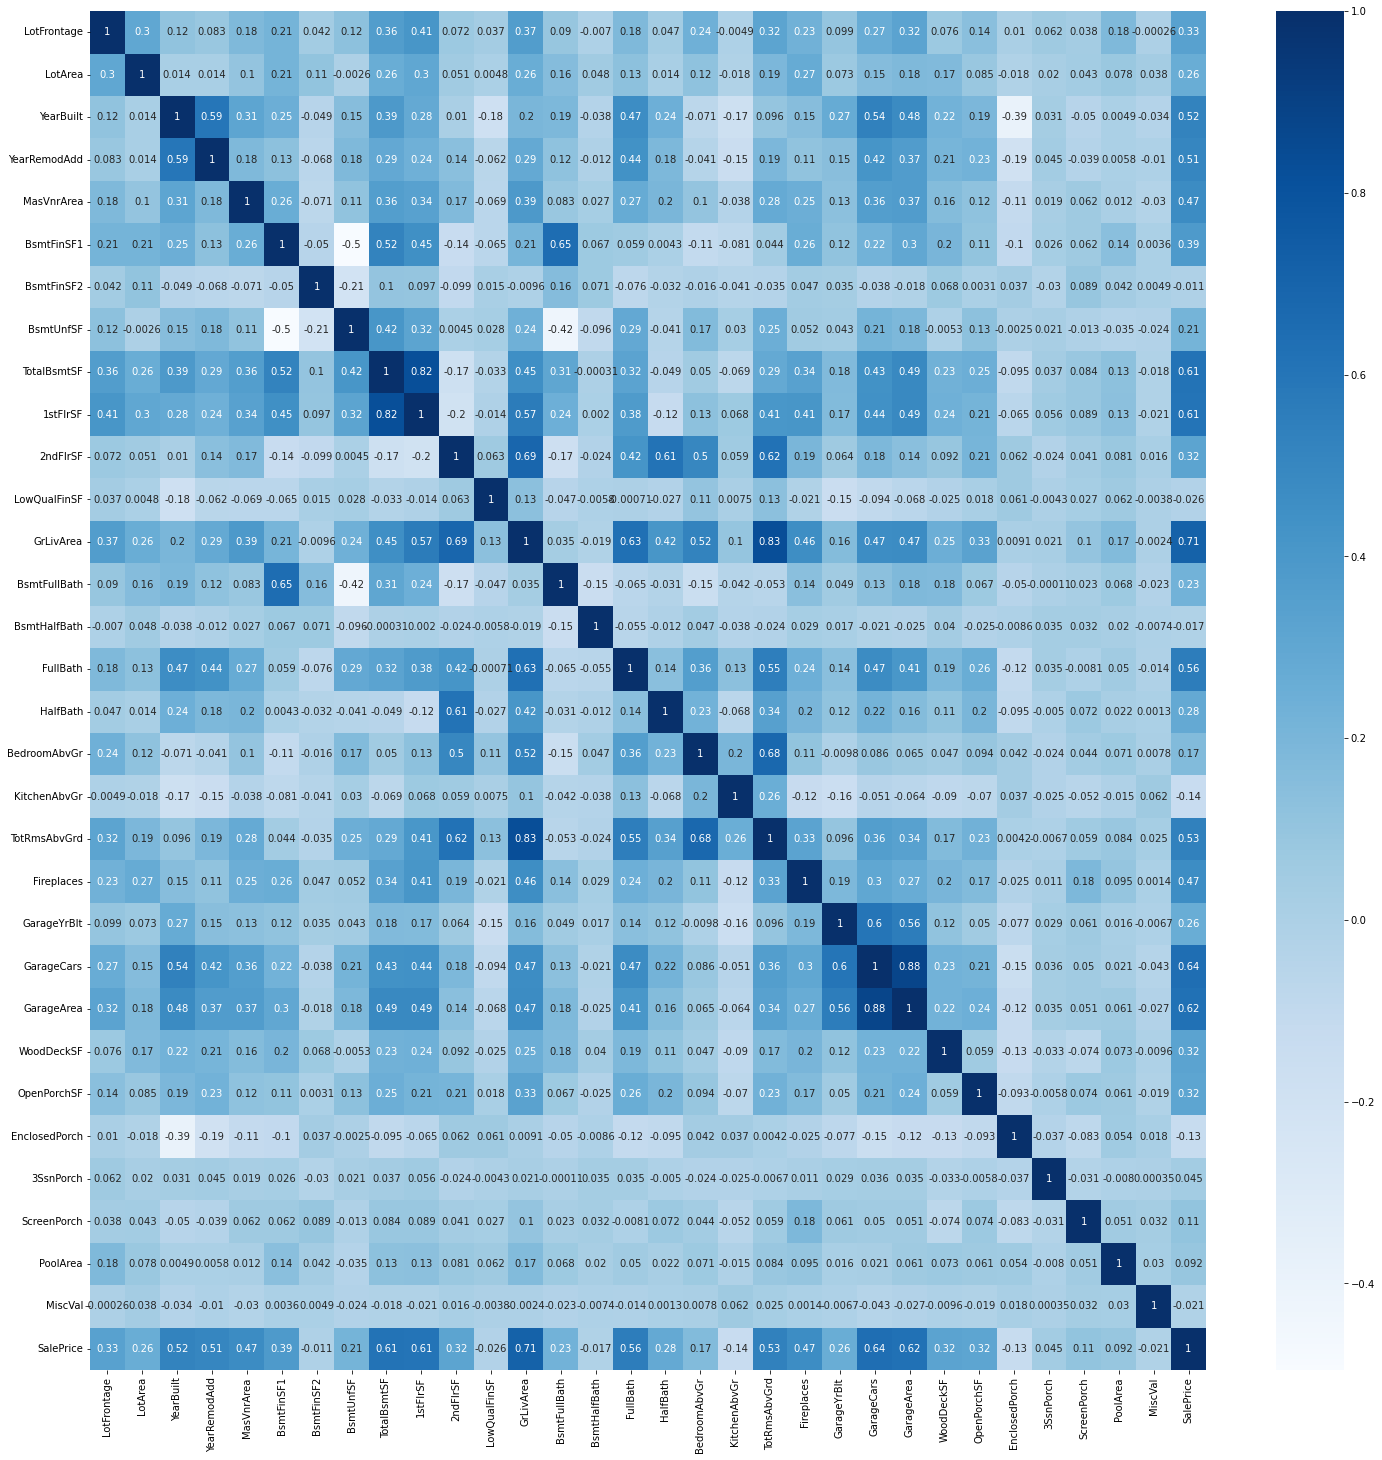

In [98]:
corr = df_visu_numeric.corr()
plt.figure(figsize = (25,25))
sns.heatmap(corr, annot = True, cmap='Blues')
plt.show()

# Conclusions from EDA

- Analyzed data with different visualization plots.
- There are few outliers and they are removed.
- There are few missing values and filled those missing values with appropriate choice( zero or mean or median or 'None').
- From the correlation plot, one can observe that, a lot of corrleated features are in the data set, I followed RFE and regularization method to remove correlated features and selected the final set of best predictor variables.


function to display MSE,RMSE,MAE,R2 score

In [99]:
def get_error_stats(y,y_pred,name="Test",DoPrint=True):
    MSE = mean_squared_error(y, y_pred)
    RMSE = math.sqrt(mean_squared_error(y, y_pred))
    MAE = mean_absolute_error(y, y_pred)
    R2 = r2_score(y, y_pred)
    if DoPrint:
        print(F"MSE {name} {MSE}")
        print(F"RMSE {name} {RMSE}")
        print(F"MAE Score {name} {MAE}")
        print(F"R2 Score {name} {R2} \n")
    return MSE,RMSE,MAE,R2

function to calculate VIF scores

In [100]:
#Function to calculate VIF score
def VIF_SCORE(X):
    vif = pd.DataFrame()    
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif
    return vif

train and test data splits using sklearn

In [101]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
#split the dataset into 70% train and 30% test using train_test_split funstion
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
#get min max sclar object
scaler = MinMaxScaler()#it worked better here
#scaler = StandardScaler()

apply fit and transform on numerical features using sklearn(for test data, only transform applied)

In [102]:
numeric_columns_to_transform = df_visu_numeric.columns#exclude binary columns
df_train[numeric_columns_to_transform] = scaler.fit_transform(df_train[numeric_columns_to_transform])
df_test[numeric_columns_to_transform] = scaler.transform(df_test[numeric_columns_to_transform])
#removing target variable 'SalePrice' from training variables list
y_train = df_train.pop('SalePrice')
y_test = df_test.pop('SalePrice')
X_train = df_train
X_test = df_test

Run RFE for feature selection

In [103]:
# Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [104]:
df_train.shape#display dataframe shape

(1000, 301)

display each feature based on rank

In [105]:
#zip X_train.columns,rfe.support_,rfe.ranking_
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 34),
 ('LotArea', False, 11),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 84),
 ('MasVnrArea', False, 69),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 76),
 ('BsmtHalfBath', False, 77),
 ('FullBath', False, 56),
 ('HalfBath', False, 187),
 ('BedroomAbvGr', False, 28),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 33),
 ('Fireplaces', False, 142),
 ('GarageYrBlt', False, 94),
 ('GarageCars', False, 18),
 ('GarageArea', False, 246),
 ('WoodDeckSF', False, 67),
 ('OpenPorchSF', False, 71),
 ('EnclosedPorch', False, 85),
 ('3SsnPorch', False, 224),
 ('ScreenPorch', False, 29),
 ('PoolArea', True, 1),
 ('MiscVal', False, 138),
 ('MSSubClass_160', False, 130),
 ('MSSubClass_180', False, 72),
 ('MSSubClass_190', False, 30),
 ('MSSubClass_20', False, 79),
 ('MSSubClass_30', 

take the highest ranked variables based on RFE selected variables

In [106]:
col = X_train.columns[rfe.support_]#new set of features after RFE
X_train_new = X_train[col]
X_test_new = X_test[col]
col

Index(['YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr',
       'PoolArea', 'Condition2_RRAe', 'OverallQual_10', 'OverallQual_2',
       'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallCond_2',
       'OverallCond_3', 'OverallCond_4', 'OverallCond_5', 'OverallCond_6',
       'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'RoofStyle_Shed',
       'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'Foundation_Wood',
       'BsmtQual_None', 'BsmtCond_None', 'BsmtFinType1_None',
       'GarageQual_None', 'GarageCond_None', 'PoolQC_Fa', 'PoolQC_Gd',
       'PoolQC_None', 'MiscFeature_TenC', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

Run Linear Regression using RFE selected features

In [107]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train_new
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())
VIF_SCORE(X_train_new)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     239.4
Date:                Tue, 01 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:55:40   Log-Likelihood:                 1999.9
No. Observations:                1000   AIC:                            -3918.
Df Residuals:                     959   BIC:                            -3717.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.11

,Features,VIF
25,OverallCond_6,inf
32,RoofMatl_Tar&Grv,inf
24,OverallCond_5,inf
1,BsmtFinSF1,inf
26,OverallCond_7,inf
27,OverallCond_8,inf
28,OverallCond_9,inf
46,PoolQC_None,inf
30,RoofMatl_CompShg,inf
31,RoofMatl_Metal,inf


Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.74e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.

Instantiate Lasso and Ridge regression models, and train using these models

In [108]:
ridge = Ridge()
ridge.fit(X_train_new, y_train)

lasso = Lasso()
lasso.fit(X_train_new, y_train)

Lasso()

Run Ridge regression using RFE selected features, and display training and test data results

In [109]:
print("Number of non-zero Coefficients {}".format(np.sum(ridge.coef_!=0)))
y_pred_train = ridge.predict(X_train_new)
get_error_stats(y_train,y_pred_train,name="Train")

y_pred_test = ridge.predict(X_test_new)
get_error_stats(y_test,y_pred_test,name="Test")

Number of non-zero Coefficients 50
MSE Train 0.0011068748241448794
RMSE Train 0.0332697283449216
MAE Score Train 0.023481660823008736
R2 Score Train 0.906046249542214 

MSE Test 0.00118173341986049
RMSE Test 0.03437634971692734
MAE Score Test 0.025046884904263694
R2 Score Test 0.8961262453075405 



(0.00118173341986049,
 0.03437634971692734,
 0.025046884904263694,
 0.8961262453075405)

Run Lasso regression using RFE selected features, and display train and test data results

In [110]:
print("Number of non-zero Coefficients {}".format(np.sum(lasso.coef_!=0)))
y_pred_train = lasso.predict(X_train_new)
get_error_stats(y_train,y_pred_train,name="Train")

y_pred_test = lasso.predict(X_test_new)
get_error_stats(y_test,y_pred_test,name="Test")

Number of non-zero Coefficients 0
MSE Train 0.01178106056173037
RMSE Train 0.10854059407304886
MAE Score Train 0.07779987490348562
R2 Score Train 0.0 

MSE Test 0.011424872598431666
RMSE Test 0.10688719567109835
MAE Score Test 0.07808817321409323
R2 Score Test -0.004240375821981113 



(0.011424872598431666,
 0.10688719567109835,
 0.07808817321409323,
 -0.004240375821981113)

vary alpha values and get MSE values for Ridge regression and visualize it

In [111]:
MSE_train=[]
MSE_test=[]
coefs = []
n_alphas = 500
alphas = np.logspace(-10, 5, n_alphas)
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_new, y_train)
    coefs.append(ridge.coef_)
    y_pred_train = ridge.predict(X_train_new)
    MSE_train.append(mean_squared_error(y_train,y_pred_train))

    y_pred_test = ridge.predict(X_test_new)
    MSE_test.append(mean_squared_error(y_test,y_pred_test))

Visualize alphas and weights for Ridge regression

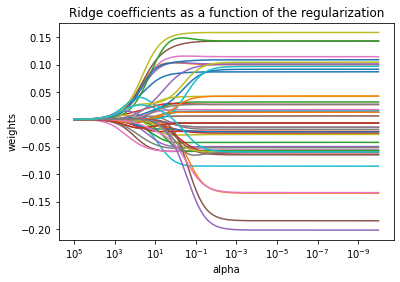

In [112]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

vary alpha values and get MSE values for Lasso regression and visualize it

In [113]:
MSE_train=[]
MSE_test=[]
coefs = []
n_alphas = 500
alphas = np.logspace(-10, 5, n_alphas)
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_new, y_train)
    coefs.append(lasso.coef_)
    y_pred_train = lasso.predict(X_train_new)
    MSE_train.append(mean_squared_error(y_train,y_pred_train))

    y_pred_test = lasso.predict(X_test_new)
    MSE_test.append(mean_squared_error(y_test,y_pred_test))

Visualize alphas and weights for Lasso regression

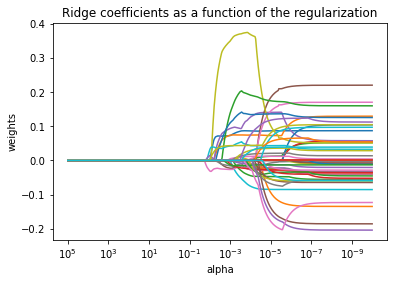

In [114]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Run GridsearchCV algorithm on different values of alpha using Ridge regression

In [115]:
# list of alphas to tune
n_alphas
#params = {'alpha': np.logspace(-2, 0.001, 100)}
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11,12,13,14,15,16,17,18,19,20, 50]}

# Applying Ridge
ridge = Ridge()
# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)           
ridge_model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11, 12, 13, 14, 15,
                                   16, 17, 18, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

display GridsearchCV results using Ridge regression

In [116]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.00,0.00,0.00,0.00,0.00,{'alpha': 0.0001},-0.02,-0.02,-0.03,-0.03,-0.03,-0.03,0.00,18,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.00
1,0.00,0.01,0.00,0.00,0.00,{'alpha': 0.001},-0.02,-0.02,-0.03,-0.03,-0.03,-0.03,0.00,17,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.00
2,0.01,0.01,0.00,0.00,0.01,{'alpha': 0.01},-0.02,-0.02,-0.03,-0.03,-0.03,-0.03,0.00,16,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.00
3,0.01,0.01,0.00,0.00,0.10,{'alpha': 0.1},-0.02,-0.02,-0.03,-0.03,-0.03,-0.03,0.00,14,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.00
4,0.01,0.01,0.00,0.00,0.20,{'alpha': 0.2},-0.02,-0.02,-0.03,-0.03,-0.03,-0.02,0.00,13,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.00


visualize training and test results with different values of alpha

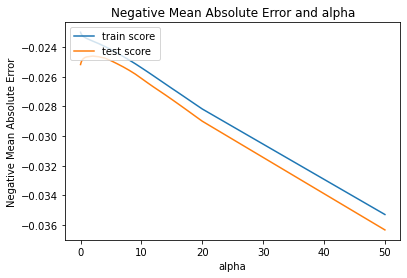

In [117]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Run GridsearchCV algorithm on different values of alpha using Lasso regression

In [118]:
# list of alphas to tune
n_alphas
#params = {'alpha': np.logspace(-2, 0.001, 100)}
params = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0 ]}

# Applying Lasso
lasso = Lasso()
# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)           
lasso_model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

display GridsearchCV results using Lasso regression

In [119]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.02,0.01,0.00,0.01,0.00,{'alpha': 1e-05},-0.02,-0.02,-0.03,-0.03,-0.03,-0.03,0.00,3,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.00
1,0.02,0.01,0.00,0.00,0.00,{'alpha': 0.0001},-0.02,-0.02,-0.03,-0.03,-0.02,-0.02,0.00,1,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.00
2,0.01,0.01,0.00,0.01,0.00,{'alpha': 0.0002},-0.02,-0.02,-0.03,-0.03,-0.02,-0.02,0.00,2,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.00
3,0.00,0.00,0.01,0.01,0.00,{'alpha': 0.0003},-0.02,-0.02,-0.03,-0.03,-0.02,-0.03,0.00,4,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.00
4,0.00,0.01,0.00,0.00,0.00,{'alpha': 0.0005},-0.03,-0.02,-0.03,-0.03,-0.03,-0.03,0.00,5,-0.02,-0.03,-0.02,-0.02,-0.02,-0.02,0.00


visualize training and test results with different values of alpha

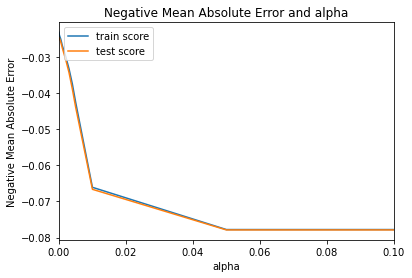

In [120]:
# plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim([0, 0.1])

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

display best estimator alpha value for ridge regression

In [121]:
ridge_model_cv.best_estimator_.alpha

2.0

once again train the data using ridge regression and best alpha which we received using GridsearchCV

In [122]:
alpha = ridge_model_cv.best_estimator_.alpha
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_new, y_train) 

Ridge(alpha=2.0)

Get Training and Test data results for Ridge regression using best alpha(regularization parameter)

In [123]:
print("Ridge Number of non-zero Coefficients {}".format(np.sum(ridge.coef_!=0)))
y_pred_train = ridge.predict(X_train_new)
get_error_stats(y_train,y_pred_train,name="Train")

y_pred_test = ridge.predict(X_test_new)
get_error_stats(y_test,y_pred_test,name="Test")

Ridge Number of non-zero Coefficients 50
MSE Train 0.0011340223199113653
RMSE Train 0.03367524788195872
MAE Score Train 0.023621151194653998
R2 Score Train 0.9037419157664696 

MSE Test 0.0011608495220026408
RMSE Test 0.03407124186176137
MAE Score Test 0.02477157200853807
R2 Score Test 0.8979619290976839 



(0.0011608495220026408,
 0.03407124186176137,
 0.02477157200853807,
 0.8979619290976839)

display best estimator alpha value for lasso regression

In [124]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

once again train the data using lasso regression and best alpha which we received using GridsearchCV

In [125]:
alpha = lasso_model_cv.best_estimator_.alpha
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.0001)

Get Training and Test data results for Lasso regression using best alpha(regularization parameter)

In [126]:
print("Lasso Number of non-zero Coefficients {}".format(np.sum(lasso.coef_!=0)))
y_pred_train = lasso.predict(X_train_new)
get_error_stats(y_train,y_pred_train,name="Train")

y_pred_test = lasso.predict(X_test_new)
get_error_stats(y_test,y_pred_test,name="Test")

Lasso Number of non-zero Coefficients 30
MSE Train 0.001154427841141163
RMSE Train 0.03397687215064334
MAE Score Train 0.0237527385178099
R2 Score Train 0.9020098542833054 

MSE Test 0.0011809747032773916
RMSE Test 0.03436531250079638
MAE Score Test 0.025035683883856817
R2 Score Test 0.8961929361016818 



(0.0011809747032773916,
 0.03436531250079638,
 0.025035683883856817,
 0.8961929361016818)

display most dominent features of ridge regression

In [127]:
df_show_coeff_ridge = pd.DataFrame({'features':X_train_new.columns, 'coefficients':ridge.coef_.round(5),
                                   'abs coefficients':abs(ridge.coef_.round(5))})
df_show_coeff_ridge = df_show_coeff_ridge.sort_values(by='abs coefficients', ascending=False)
df_show_coeff_ridge.reset_index(drop=True, inplace=True)  
df_show_coeff_ridge.head(50)

,features,coefficients,abs coefficients
0,GrLivArea,0.15,0.15
1,OverallQual_10,0.14,0.14
2,1stFlrSF,0.13,0.13
3,2ndFlrSF,0.11,0.11
4,BsmtFinSF1,0.10,0.10
5,OverallQual_9,0.10,0.10
6,TotalBsmtSF,0.10,0.10
7,YearBuilt,0.08,0.08
8,KitchenAbvGr,-0.07,0.07
9,RoofMatl_WdShngl,0.07,0.07


display most dominent feature of lasso regression

In [128]:
df_show_coeff_lasso = pd.DataFrame({'features':X_train_new.columns, 'coefficients':lasso.coef_.round(5),
                                   'abs coefficients':abs(lasso.coef_.round(5))})
df_show_coeff_lasso = df_show_coeff_lasso.sort_values(by='abs coefficients', ascending=False)
df_show_coeff_lasso.reset_index(drop=True, inplace=True)  
df_show_coeff_lasso.head(50)

,features,coefficients,abs coefficients
0,GrLivArea,0.37,0.37
1,OverallQual_10,0.19,0.19
2,OverallQual_9,0.13,0.13
3,TotalBsmtSF,0.13,0.13
4,YearBuilt,0.09,0.09
5,KitchenAbvGr,-0.08,0.08
6,BsmtFinSF1,0.07,0.07
7,RoofMatl_WdShngl,0.07,0.07
8,OverallCond_3,-0.04,0.04
9,SaleType_New,0.04,0.04


calculate residual values on tet data set

In [129]:
y_pred = lasso.predict(X_test_new)
residual = y_test - y_pred

display residual plot for lasso regression predicted values , it is having normal distribution

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

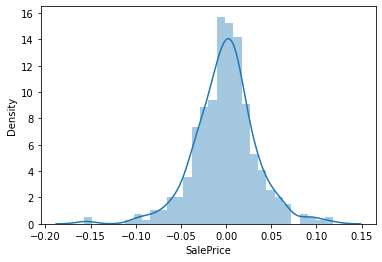

In [130]:
sns.distplot(residual)

display Q-Q plot for lasso regression residual values

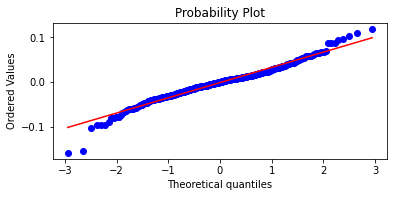

In [131]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

display scatter plot between prediction values and residual values, error is having constant variance(homoscedasticity)

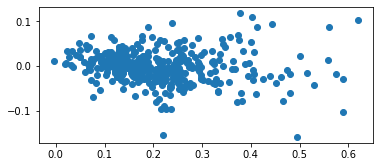

In [132]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

display scatter plot between prediction and ground truth values

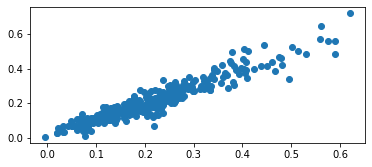

In [133]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, y_test)

auto correlation plot

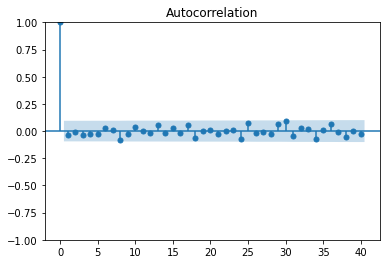

In [134]:
# import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

display box plot for residual values

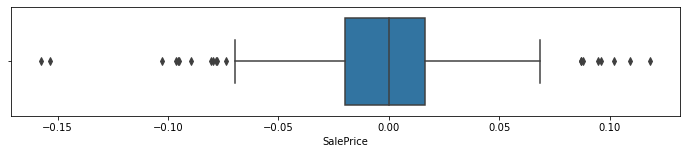

In [135]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=residual,whis=1.5)

# Final Conclusions

- Both Ridge and Lasso regressions performed similar on this dataset, However I would like to take Lasso as the best performed model because of fewer predictor variables.

- Ridge Regression Performance:
  - Ridge Number of non-zero Coefficients 50
  - MSE Train 0.0011340223199113653
  - RMSE Train 0.03367524788195872
  - MAE Score Train 0.023621151194653998
  - R2 Score Train 0.9037419157664696 

  - MSE Test 0.0011608495220026408
  - RMSE Test 0.03407124186176137
  - MAE Score Test 0.02477157200853807
  - R2 Score Test 0.8979619290976839 

- Lasso Regression Performance:
  - Lasso Number of non-zero Coefficients 30
  - MSE Train 0.001154427841141163
  - RMSE Train 0.03397687215064334
  - MAE Score Train 0.0237527385178099
  - R2 Score Train 0.9020098542833054 

  - MSE Test 0.0011809747032773916
  - RMSE Test 0.03436531250079638
  - MAE Score Test 0.025035683883856817
  - R2 Score Test 0.8961929361016818 
 
- As you can see with the help of 30 predictor variables Lasso regression can achieve same results as Ridge regression.

- Top five features from Ridge regression are ,GrLivArea,OverallQual_10,1stFlrSF,2ndFlrSF,BsmtFinSF1
- The Optimum Lamda Value(regularization parameter) for Ridge regression is 2

- Top five features from Lasso regression are ,GrLivArea,OverallQual_10,OverallQual_9,TotalBsmtSF,YearBuilt
- The Optimum Lamda Value(regularization parameter) for Lasso regression is 0.0001

- All assumptions of Multiple Linear Regression are met( Homoscedasticity, error terms are normal distributed, error terms are independent of each other, linear relationship between predictor variables and Target variable)

- Most Dominent Features:
    - GrLivArea: Above grade (ground) living area square feet
    - OverallQual: Rates the overall material and finish of the house
       - 10	Very Excellent
       - 9	Excellent
    - TotalBsmtSF: Total square feet of basement area
    - YearBuilt: Original construction date
	

#  Subjective Questions

# Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


In [136]:
alpha = 4 #doubling the alpha
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_new, y_train) 
print("Ridge Number of non-zero Coefficients {}".format(np.sum(ridge.coef_!=0)))
y_pred_train = ridge.predict(X_train_new)
get_error_stats(y_train,y_pred_train,name="Train")

y_pred_test = ridge.predict(X_test_new)
get_error_stats(y_test,y_pred_test,name="Test")

Ridge Number of non-zero Coefficients 50
MSE Train 0.0011920841086766317
RMSE Train 0.03452657105298225
MAE Score Train 0.02385650071668094
R2 Score Train 0.898813514926746 

MSE Test 0.0011557345497783611
RMSE Test 0.033996096096145526
MAE Score Test 0.024420507582906096
R2 Score Test 0.8984115325032864 



(0.0011557345497783611,
 0.033996096096145526,
 0.024420507582906096,
 0.8984115325032864)

In [137]:
df_show_coeff_ridge = pd.DataFrame({'features':X_train_new.columns, 'coefficients':ridge.coef_.round(5),
                                   'abs coefficients':abs(ridge.coef_.round(5))})
df_show_coeff_ridge = df_show_coeff_ridge.sort_values(by='abs coefficients', ascending=False)
df_show_coeff_ridge.reset_index(drop=True, inplace=True)  
df_show_coeff_ridge.head(50)

,features,coefficients,abs coefficients
0,GrLivArea,0.14,0.14
1,OverallQual_10,0.13,0.13
2,1stFlrSF,0.12,0.12
3,2ndFlrSF,0.11,0.11
4,BsmtFinSF1,0.10,0.10
5,OverallQual_9,0.10,0.10
6,TotalBsmtSF,0.10,0.10
7,YearBuilt,0.08,0.08
8,OverallQual_5,-0.06,0.06
9,OverallQual_4,-0.06,0.06


In [138]:
alpha = 0.0002 #doubling the alpha
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_new, y_train) 
print("Lasso Number of non-zero Coefficients {}".format(np.sum(lasso.coef_!=0)))
y_pred_train = lasso.predict(X_train_new)
get_error_stats(y_train,y_pred_train,name="Train")

y_pred_test = lasso.predict(X_test_new)
get_error_stats(y_test,y_pred_test,name="Test")

Lasso Number of non-zero Coefficients 25
MSE Train 0.0012089456936446598
RMSE Train 0.03476989637092207
MAE Score Train 0.0241511902563088
R2 Score Train 0.8973822698465873 

MSE Test 0.0011924225162599112
RMSE Test 0.03453147138857409
MAE Score Test 0.025114046419138766
R2 Score Test 0.8951866792779967 



(0.0011924225162599112,
 0.03453147138857409,
 0.025114046419138766,
 0.8951866792779967)

In [139]:
df_show_coeff_lasso = pd.DataFrame({'features':X_train_new.columns, 'coefficients':lasso.coef_.round(5),
                                   'abs coefficients':abs(lasso.coef_.round(5))})
df_show_coeff_lasso = df_show_coeff_lasso.sort_values(by='abs coefficients', ascending=False)
df_show_coeff_lasso.reset_index(drop=True, inplace=True)  
df_show_coeff_lasso.head(50)

,features,coefficients,abs coefficients
0,GrLivArea,0.37,0.37
1,OverallQual_10,0.20,0.20
2,OverallQual_9,0.14,0.14
3,TotalBsmtSF,0.11,0.11
4,YearBuilt,0.09,0.09
5,BsmtFinSF1,0.07,0.07
6,KitchenAbvGr,-0.06,0.06
7,OverallQual_8,0.05,0.05
8,SaleType_New,0.04,0.04
9,OverallCond_3,-0.04,0.04


•	After doubling the alpha values, a very small value of r2 score decreased on the Train and Test dataset, with small variation in MSE,RMSE,MAE values, but this can be a negligible effect.

•	Top five features of Ridge and Lasso regressions do not change but the sixth feature in Lasso regression is changed

•	Few coefficients of top five features are changed.


# Question 2
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?


-	The Optimum alpha Value (regularization parameter) for Ridge regression is 2.
-	The Optimum alpha Value (regularization parameter) for Lasso regression is 0.0001.
-	Both Ridge and Lasso regressions performed similarly on the Train and Test datasets, however, I would like to take Lasso as the best-performed model because of fewer number of predictor variables.
-	30 predictor variables using Lasso regression can achieve the same result as Ridge regression with 50 predictor variables.
-	A model should be as simple as possible and it should be robust, Lasso is performing best on both train and test datasets using fewer predictor variables.


# Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [140]:
remove_top_five_cols=['GrLivArea','OverallQual_10','OverallQual_9','TotalBsmtSF','YearBuilt']
alpha = 0.0001
X_train_remove_top_five_cols = X_train_new.drop(remove_top_five_cols,axis=1)
X_test_remove_top_five_cols = X_test_new.drop(remove_top_five_cols,axis=1)
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_remove_top_five_cols, y_train) 
print("Lasso Number of non-zero Coefficients {}".format(np.sum(lasso.coef_!=0)))
y_pred_train = lasso.predict(X_train_remove_top_five_cols)
get_error_stats(y_train,y_pred_train,name="Train")

y_pred_test = lasso.predict(X_test_remove_top_five_cols)
get_error_stats(y_test,y_pred_test,name="Test")

Lasso Number of non-zero Coefficients 27
MSE Train 0.0013175928630160829
RMSE Train 0.03629866200035592
MAE Score Train 0.02630779321670336
R2 Score Train 0.8881600806555434 

MSE Test 0.0015780717348324892
RMSE Test 0.03972495103625037
MAE Score Test 0.028208450875993038
R2 Score Test 0.8612883129847968 



(0.0015780717348324892,
 0.03972495103625037,
 0.028208450875993038,
 0.8612883129847968)

In [141]:
X_train_remove_top_five_cols.shape

(1000, 45)

In [142]:
X_train_remove_top_five_cols.columns

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'KitchenAbvGr', 'PoolArea', 'Condition2_RRAe',
       'OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5',
       'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallCond_2',
       'OverallCond_3', 'OverallCond_4', 'OverallCond_5', 'OverallCond_6',
       'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'RoofStyle_Shed',
       'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'Foundation_Wood',
       'BsmtQual_None', 'BsmtCond_None', 'BsmtFinType1_None',
       'GarageQual_None', 'GarageCond_None', 'PoolQC_Fa', 'PoolQC_Gd',
       'PoolQC_None', 'MiscFeature_TenC', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

display predictor variables after removing top five

In [143]:
df_show_coeff_lasso = pd.DataFrame({'features':X_train_remove_top_five_cols.columns,'coefficients':lasso.coef_.round(5),
                                    'abs coefficients':abs(lasso.coef_.round(5))})
df_show_coeff_lasso = df_show_coeff_lasso.sort_values(by='abs coefficients', ascending=False)
df_show_coeff_lasso.reset_index(drop=True, inplace=True)  
df_show_coeff_lasso.head(50)

,features,coefficients,abs coefficients
0,1stFlrSF,0.25,0.25
1,2ndFlrSF,0.19,0.19
2,BsmtFinSF1,0.19,0.19
3,OverallQual_4,-0.17,0.17
4,OverallQual_5,-0.17,0.17
5,OverallQual_3,-0.17,0.17
6,OverallQual_6,-0.16,0.16
7,OverallQual_7,-0.13,0.13
8,RoofMatl_WdShngl,0.11,0.11
9,BsmtUnfSF,0.10,0.10


-	The Optimum alpha Value (regularization parameter) for Lasso regression is 0.0001.
-	GrLivArea, OverallQual_10, OverallQual_9, TotalBsmtSF, YearBuilt are the top five features of Lasso regression.
-	After removing the top five features, The r2 score decreased from 0.90 to 0.88 on the training dataset and decreased from 0.89 to 0.86 on the test dataset.
-	Now, 1stFlrSF, 2ndFlrSF, BsmtFinSF1, OverallQual_4, OverallQual_5 are the top five features of Lasso regression.


1stFlrSF,2ndFlrSF,BsmtFinSF1,OverallQual_4,OverallQual_5

# Question 4
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?


-	A model should be as simple as possible and it should be robust.
-	Considering bias and variance tradeoff, underfit model has high bias and low variance, and overfit model has high variance and low bias.
-	A good model should have low bias and low variance, it should not be complex and it should utilize a minimum number of variables to make predictions.
-	A robust model should perform well on both train and test datasets, so test data is very important for analyzing the robustness of the model.
-	Regularization helps to overcome overfitting and a robust model performs well on the unseen dataset.
-	Sometimes due to the regularization effect the accuracy on the training dataset may decrease a little bit but the model will do well on the unseen dataset.
-	So, it is very important to remember that model should not overfit on the train dataset and it should be flexible to make predictions if we make any changes to the training dataset.
-	As complexity increases, bias reduces and variance increases, and we aim to find the optimal point where the total error is least.
